In [70]:
"""
1 July 2021
Abraham Tishelman-Charny

The purpose of this notebook is to plot Data / MC of WWZ in a control region of 0-100 Mgg 
in order to validate the HH->WWgg MC
"""

import uproot
from matplotlib import pyplot as plt 
import numpy as np
import copy 
from collections import OrderedDict
import operator 
import collections 
import pandas as pd 
import awkward as ak
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [56]:
##-- With DNN score 
# Files with DNN score: For SM SL DNN AN_20_165_v7 (with MET fix)
#direc = ""

#direc = "/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/"
direc = "/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/DY_CR/"

# p_data = "%s/Data_WWZPhaseSpace_2017_MoreVars.root"%(direc) ##-- DoubleEG data 
p_data = "%s/SingleElectron_Data_2017_MoreVars.root"%(direc) ##-- SingleElectron data 
# p_DYJets = "%s/Zee_2017_MoreVars.root"%(direc)
p_DYJets = "%s/Zee_v14_ext1-v1_hadded_MoreVars.root"%(direc)
p_WWZ = "%s/WWZ_MoreVars.root"%(direc)

# ##-- Without DNN score 
# direc = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/WWZ_SignalTopology_Checks/2017/"
# # p_data = "%s/Data_WWZPhaseSpace_2017_MoreVars.root"%(direc) ##-- DoubleEG data 
# p_data = "%s/SingleElectron_Data_2017_hadded/SingleElectron_Data_2017.root"%(direc) ##-- SingleElectron data 
# # p_DYJets = "%s/Zee_2017_MoreVars.root"%(direc)
# p_DYJets = "%s/Zee_hadded/Zee_v14_ext1-v1_hadded.root"%(direc)
# p_WWZ = "%s/WWZ_2017_hadded/WWZ.root"%(direc)

backgrounds = {
     
    
    # gamma jet 
    "GJet_Pt-20to40" : "GJet_20to40",
    "GJet_Pt-20toInf" : "GJet_20toInf",
    "GJet_Pt-40toInf": "GJet_Pt40toInf",
    
    # gamma gamma jet 
    "DiPhotonJetsBox_M40_80" : "DiPho_M40_80",
    "DiPhotonJetsBox_MGG-80toInf" : "DiPho_M80ToInf",
#     "WW_TuneCP5" : "WW",
#     "TTGJets" : "TTGJets",    
    
    # tt(V) gammas
    "TTJets" : "TTJets",
    "TTGG_0Jets" : "TTGG_0Jets",

    "TTWJetsToLNu" : "TTWJetsToLNu",
#     "WGToLNuG_01J" : "WGToLNuG_01J",
    "TTZToLLNuNu" : "TTZToLLNuNu",
    "ZGToLLG_01J" : "ZGToLLG_01J",    
    
    # V(s) + gamma(s) + jets 
    "W1JetsToLNu_LHEWpT_0-50" : "W1JetsToLNu_LHEWpT_0_50",
    "W1JetsToLNu_LHEWpT_50-150" : "W1JetsToLNu_LHEWpT_50_150",
    "W1JetsToLNu_LHEWpT_150-250" : "W1JetsToLNu_LHEWpT_150_250",
    "W1JetsToLNu_LHEWpT_250-400" : "W1JetsToLNu_LHEWpT_250_400",
    "W1JetsToLNu_LHEWpT_400-inf" : "W1JetsToLNu_LHEWpT_400_inf",
    
    "W2JetsToLNu_LHEWpT_0-50" : "W2JetsToLNu_LHEWpT_0_50",
    "W2JetsToLNu_LHEWpT_50-150" : "W2JetsToLNu_LHEWpT_50_150",
    "W2JetsToLNu_LHEWpT_150-250" : "W2JetsToLNu_LHEWpT_150_250",
    "W2JetsToLNu_LHEWpT_250-400" : "W2JetsToLNu_LHEWpT_250_400",
    "W2JetsToLNu_LHEWpT_400-inf" : "W2JetsToLNu_LHEWpT_400_inf",    
    
    "W3JetsToLNu" : "W3JetsToLNu",
    "W4JetsToLNu" : "W4JetsToLNu",    
    
    "WGGJets" : "WGGJets",
    "WGJJToLNu" : "WGJJToLNu",
    "WWTo1L1Nu2Q" : "WWTo1L1Nu2Q",
    "ttWJets" : "ttWJets",
    "ZZ" : "ZZ",    
    
    # H to gg 
    "GluGluHToGG" : "GluGluHToGG",
    "VBFHToGG" : "VBFHToGG",
    "VHToGG" : "VHToGG",
    
#     "W1JetsToLNu_LHEWpT_0-50" : "W1JetsToLNu_LHEWpT_0_50",
#     "W1JetsToLNu_LHEWpT_50-150" : "W1JetsToLNu_LHEWpT_50_150",
#     "W1JetsToLNu_LHEWpT_150-250" : "W1JetsToLNu_LHEWpT_150_250",
#     "W1JetsToLNu_LHEWpT_250-400" : "W1JetsToLNu_LHEWpT_250_400",
#     "W1JetsToLNu_LHEWpT_400-inf" : "W1JetsToLNu_LHEWpT_400_inf",
    
#     "W2JetsToLNu_LHEWpT_0-50" : "W2JetsToLNu_LHEWpT_0_50",
#     "W2JetsToLNu_LHEWpT_50-150" : "W2JetsToLNu_LHEWpT_50_150",
#     "W2JetsToLNu_LHEWpT_150-250" : "W2JetsToLNu_LHEWpT_150_250",
#     "W2JetsToLNu_LHEWpT_250-400" : "W2JetsToLNu_LHEWpT_250_400",
#     "W2JetsToLNu_LHEWpT_400-inf" : "W2JetsToLNu_LHEWpT_400_inf",    
    
#     "W3JetsToLNu" : "W3JetsToLNu",
#     "W4JetsToLNu" : "W4JetsToLNu",
    
}

background_directories = {
    "GJet_Pt-20to40" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "GJet_Pt-20toInf" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "GJet_Pt-40toInf": "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "DiPhotonJetsBox_M40_80" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "DiPhotonJetsBox_MGG-80toInf" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
#     "WW_TuneCP5" : "WW",
#     "TTGJets" : "TTGJets",
    "TTJets" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "TTGG_0Jets" : "Flashgg_Backgrounds_Zee_Preselections_2017_hadded",
    "WGGJets" : "HHWWgg_Backgrounds_ZeePreselections_2017_hadded",
    "WGJJToLNu" : "HHWWgg_Backgrounds_ZeePreselections_2017_hadded",
    "WWTo1L1Nu2Q" : "HHWWgg_Backgrounds_ZeePreselections_2017_hadded",
    "ttWJets" : "HHWWgg_Backgrounds_ZeePreselections_2017_hadded",
    "ZZ" : "More_Backgrounds_hadded",
    "TTWJetsToLNu" : "More_Backgrounds_hadded",
#     "WGToLNuG_01J" : "More_Backgrounds_v2_hadded",
    "TTZToLLNuNu" : "More_Backgrounds_hadded",
    "ZGToLLG_01J" : "More_Backgrounds_v3_hadded",
    
    "GluGluHToGG" : "Higgs_bkg_2017_125Only_hadded",
    "VBFHToGG" : "Higgs_bkg_2017_125Only_hadded",
    "VHToGG" : "Higgs_bkg_2017_125Only_hadded",
    
    ##-- WJets 
    "W1JetsToLNu_LHEWpT_0-50" : "WJets_pTBinned_hadded",
    "W1JetsToLNu_LHEWpT_50-150" : "WJets_pTBinned_hadded",
    "W1JetsToLNu_LHEWpT_150-250" : "WJets_pTBinned_hadded",
    "W1JetsToLNu_LHEWpT_250-400" : "WJets_pTBinned_hadded",
    "W1JetsToLNu_LHEWpT_400-inf" : "WJets_pTBinned_hadded",
    
    "W2JetsToLNu_LHEWpT_0-50" : "WJets_pTBinned_hadded",
    "W2JetsToLNu_LHEWpT_50-150" : "WJets_pTBinned_hadded",
    "W2JetsToLNu_LHEWpT_150-250" : "WJets_pTBinned_hadded",
    "W2JetsToLNu_LHEWpT_250-400" : "WJets_pTBinned_hadded",
    "W2JetsToLNu_LHEWpT_400-inf" : "WJets_pTBinned_hadded",
    
    "W3JetsToLNu" : "WJets_pTBinned_hadded",
    "W4JetsToLNu" : "WJets_pTBinned_hadded"
    
}

for b in backgrounds.keys():
    bName = backgrounds[b]
    bDirec = background_directories[b]
    exec("p_%s = '%s/%s_hadded_MoreVars.root'"%(bName, direc, b)) ##-- With DNN score 
#     exec("p_%s = '%s/%s/%s_hadded.root'"%(bName, direc, bDirec, b))
    exec("f_%s = uproot.open(p_%s)"%(bName, bName))

f_data = uproot.open(p_data)
f_DYJets = uproot.open(p_DYJets)
f_WWZ = uproot.open(p_WWZ)

print("DONE")

DONE


In [60]:
tags = [str(i) for i in range(0, 1)]
# tags = [str(i) for i in range(2, 4)]
# tags = [str(i) for i in range(0, 3)]
# tags = [str(i) for i in range(0, 4)]

variables = [
    "CMS_hgg_mass",
    "weight",
    "evalDNN_HH",
#     "Leading_Photon_pt",
#     "Subleading_Photon_pt",    
#     "METCor_pt",
#     "METCor_phi"
]

# variables = [
#     "CMS_hgg_mass",
# #     "evalDNN_HH",
#     "weight",
#     "Leading_Photon_pt",
#     "Subleading_Photon_pt",
# #     Scaled_Leading_Photon_pt,
#     "goodJets_0_pt",
#     "goodLepton_pt",
#     "Wmass_goodJets12",
# #     Scaled_Subleading_Photon_pt,
#     "goodJets_1_E",
#     "goodJets_1_pt",
#     "goodLepton_E",
#     "METCor_pt",
#     "goodJets_0_E",
#     "goodLepton_phi",
#     "Leading_Photon_MVA",
#     "goodLepton_eta",
#     "goodJets_1_eta",
#     "goodJets_1_phi",
#     "Subleading_Photon_eta",
# #     Leading_Jet_bscore,
# #     Subleading_Jet_bscore,
#     "Subleading_Photon_phi",
#     "N_goodJets",
#     "goodJets_0_phi",
# #     Scaled_Leading_Photon_E,
# #     Scaled_Subleading_Photon_E,
#     "Leading_Photon_phi",
#     "Subleading_Photon_MVA",
#     "goodJets_0_eta",
#     "Leading_Photon_eta",
#     "Wmt_L"     
# ]

for tag in tags:
    print("On Tag:",tag)
    
    for v in variables:
        print("On variable:",v)
        
        ##-- no tagsDumper/trees
        exec("Data_%s_tag_%s = f_data['Data_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))
        exec("DYJets_%s_tag_%s = f_DYJets['DYJetsToLL_M_50_TuneCP5_13TeV_amcatnloFXFX_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))    
        exec("WWZ_%s_tag_%s = f_WWZ['WWZ_4F_TuneCP5_13TeV_amcatnlo_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))  
        
#         ##-- with tagsDumper/trees
#         exec("Data_%s_tag_%s = f_data['tagsDumper/trees']['Data_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))
#         exec("DYJets_%s_tag_%s = f_DYJets['tagsDumper/trees']['DYJetsToLL_M_50_TuneCP5_13TeV_amcatnloFXFX_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))    
#         exec("WWZ_%s_tag_%s = f_WWZ['tagsDumper/trees']['WWZ_4F_TuneCP5_13TeV_amcatnlo_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))          
        
        for b in backgrounds:
            bName = backgrounds[b]
            exec("bFile = f_%s"%(bName))
            #print("bFile.keys():",bFile.keys())
            bTree = bFile.keys()[0] # taking first
            bTree = bTree.split(';')[0]
            
#             bTree = bFile.keys()[2] ##-- with tagsDumper/trees structure, 3rd should have name without tagsDumper/trees
#             bTree = bTree.split(';')[0]
#             bTree = bTree.replace("'", "")
#             bTree = bTree.replace("_HHWWggTag_0", "")
#             bTree = bTree.replace("_HHWWggTag_1", "")
#             bTree = bTree.replace("_HHWWggTag_2", "")
#             bTree = bTree.replace("tagsDumper/trees", "")
            exec("%s_%s_tag_%s = bFile['%s']['%s'].array()"%(bName, v, tag, bTree, v))  
#             exec("%s_%s_tag_%s = bFile['%s_HHWWggTag_%s']['%s'].array()"%(bName, v, tag, bTree, tag, v))  
#             exec("%s_%s_tag_%s = bFile['tagsDumper/trees']['%s_HHWWggTag_%s']['%s'].array()"%(bName, v, tag, bTree, tag, v))  
        
        ##-- with tagsDumper/trees TDirect structure
#         exec("Data_%s_tag_%s = f_data['tagsDumper/trees']['Data_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))
#         exec("DYJets_%s_tag_%s = f_DYJets['tagsDumper/trees']['DYJetsToLL_M_50_TuneCP5_13TeV_amcatnloFXFX_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))    
#         exec("WWZ_%s_tag_%s = f_WWZ['tagsDumper/trees']['WWZ_4F_TuneCP5_13TeV_amcatnlo_pythia8_13TeV_HHWWggTag_%s']['%s'].array()"%(v, tag, tag, v))           
        
print("DONE")

On Tag: 0
On variable: CMS_hgg_mass
On variable: weight
On variable: evalDNN_HH
DONE


In [61]:
nbins_glob = 20

binDict = {

#     "evalDNN_HH" : [nbins_glob, 0, 1],
#     "evalDNN_HH" : [30, 0.1, 1],
#     "evalDNN_HH" : [9, 0.1, 1],
    "evalDNN_HH" : [9, 0.1, 1],
#     "evalDNN_HH" : [30, 0.1, 1],
#     "evalDNN_HH" : [3, 0.93571, 1],
#     "evalDNN_HH" : [8, 0.82, 0.93571],
#     "evalDNN_HH" : [10, 0.64, 0.82],
#     "evalDNN_HH" : [70, 0, 1],
    "METCor_phi" : [nbins_glob, -3.15,3.15],
    
    "Leading_Photon_MVA": [nbins_glob,-1,1],
    "Subleading_Photon_MVA": [nbins_glob,-1,1],
#     "CMS_hgg_mass": [nbins_glob,100,180],
    "CMS_hgg_mass": [nbins_glob,80,100],
#     "CMS_hgg_mass": [nbins_glob,0,100],
    "weight":[nbins_glob,-10,10],
    "puweight":[nbins_glob,-2,2],
    "mjj" : [nbins_glob,0,300],
    "e_mT" : [nbins_glob,0,300],
    "mu_mT" : [nbins_glob,0,300],
    "dr_gg" : [nbins_glob,0,3],
    "dr_jj" : [nbins_glob,0,3],
    "pT_gg" : [nbins_glob,0,400],

    "goodJets_0_pt" : [nbins_glob,0,500],
    "goodLepton_pt" : [nbins_glob,0,360],
    "Wmass_goodJets12": [nbins_glob,0,750],
    # "Subleading_Photon_pt/CMS_hgg_mass",
    "goodJets_1_E": [nbins_glob,0,360],
    "goodJets_1_pt": [nbins_glob,0,360],
    "goodLepton_E": [nbins_glob,0,360],
    "METCor_pt": [nbins_glob,0,400],
    "goodJets_0_E": [nbins_glob,0,360],
    "Scaled_Leading_Photon_pt" : [nbins_glob,0,3],
    "Scaled_Subleading_Photon_pt" : [nbins_glob,0,1.5],
    "Scaled_Leading_Photon_E" : [nbins_glob,0,3],
    "Scaled_Subleading_Photon_E" : [nbins_glob,0,1.5],
    "Leading_Jet_bscore" : [nbins_glob,0,1],
    "Subleading_Jet_bscore" : [nbins_glob,0,1],
    "Diphoton_pT" : [nbins_glob,60,250],
    "Wmt_L" : [nbins_glob,0,300],

    ##-- Custom binnings 
    # "Leading_Photon_MVA": [20,-1,1],
    # "Subleading_Photon_MVA": [20,-1,1],
    # "CMS_hgg_mass": [30,100,180],
    # "weight":[1000,-10,10],
    # "puweight":[1000,-2,2],
    # "mjj" : [100,0,300],
    # "e_mT" : [100,0,300],
    # "mu_mT" : [100,0,300],
    # "dr_gg" : [60,0,3],
    # "dr_jj" : [60,0,3],
    # "pT_gg" : [40,0,400],

    # "goodJets_0_pt" : [18,0,360],
    # "goodLepton_pt" : [18,0,360],
    # "Wmass_goodJets12": [25,0,500],
    # # "Subleading_Photon_pt/CMS_hgg_mass",
    # "goodJets_1_E": [18,0,360],
    # "goodJets_1_pt": [18,0,360],
    # "goodLepton_E": [18,0,360],
    # "METCor_pt": [40,0,400],
    # "goodJets_0_E": [18,0,360],
    # "Scaled_Leading_Photon_pt" : [30,0,3],
    # "Scaled_Subleading_Photon_pt" : [15,0,1.5],
    # "Scaled_Leading_Photon_E" : [30,0,3],
    # "Scaled_Subleading_Photon_E" : [15,0,1.5],
    # "Leading_Jet_bscore" : [50,0,1],
    # "Subleading_Jet_bscore" : [50,0,1],
    # "Wmt_L" : [30,0,300],


    # "evalDNN" : [20,0,1.00001] # To include value == 1 
    # "evalDNN" : [10,0,1.00001] # To include value == 1 
    # "evalDNN" : [25,0,1.00001] # To include value == 1 
    # "evalDNN" : [100,0,1.00001] # To include value == 1 
#         "evalDNN" : [nDNNbins,evalDNNmin,evalDNNmax], # To include value == 1 
#         "evalDNN_HH" : [nDNNbins,evalDNNmin,evalDNNmax], # To include value == 1 
    "Subleading_Photon_pt" : [24,0,120]
    # "evalDNN" : [10,0,1] # To include value == 1 
}   

In [68]:
def Add_CMS_Header(plt, lumi, isWide, ax, text, addLumi):
    print("addLumi",addLumi)
    ##-- Upper left plot text
    ##-- CMS 
    fontSize = 25
    plt.text(
        # 0.05, 0.9, u"CMS $\it{Preliminary}$",
        0., 1., u"CMS ",
        fontsize=fontSize, fontweight='bold',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )

    
    if(isWide):
        prelim_x = 0.095
    else:
        prelim_x = 0.12
        
    prelim_x = 0.11 
    
    ##-- Preliminary 
    plt.text(
#         prelim_x, 0.996, u"$\it{Preliminary}$",
        prelim_x, 0.85, u"$\it{%s}$"%(text),
        fontsize=(0.9)*(fontSize),
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )      

    if(addLumi):
        upperRightText = r"%s fb$^{-1}$ (13 TeV)"%(lumi)
    else:
        upperRightText = r"(13 TeV)"

    ##-- Lumi 
    plt.text(
        1., 1., upperRightText,
        fontsize=fontSize, horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )          


In [64]:
# specialVars = {
#     "Diphoton_pT" : ["add", "Leading_Photon_pt", "Subleading_Photon_pt"]
# }
specialVars = {
    "Scaled_Leading_Photon_pt" : ["divide", "Leading_Photon_pt", "CMS_hgg_mass"],
    "Scaled_Subleading_Photon_pt" : ["divide", "Subleading_Photon_pt", "CMS_hgg_mass"],
    "Diphoton_pT" : ["add", "Leading_Photon_pt", "Subleading_Photon_pt"]
    
}

variables = [
#     "Diphoton_pT"
#     "CMS_hgg_mass",
#     "METCor_pt",
#     "METCor_phi", # just to check 
    "evalDNN_HH",
#     "Leading_Photon_pt",
#     "Scaled_Leading_Photon_pt",
#     "weight",
]

# variables = [
#     "CMS_hgg_mass",
#     "evalDNN_HH",
# #     "weight",
    
#     "Scaled_Leading_Photon_pt",
#     "Scaled_Subleading_Photon_pt",
    
#     "goodJets_0_pt",
#     "goodLepton_pt",
#     "Wmass_goodJets12",
#     "goodJets_1_E",
#     "goodJets_1_pt",
#     "goodLepton_E",
#     "METCor_pt",
#     "goodJets_0_E",
#     "goodLepton_phi",
#     "Leading_Photon_MVA",
#     "goodLepton_eta",
#     "goodJets_1_eta",
#     "goodJets_1_phi",
#     "Subleading_Photon_eta",
# # #     Leading_Jet_bscore,
# # #     Subleading_Jet_bscore,
#     "Subleading_Photon_phi",
#     "N_goodJets",
#     "goodJets_0_phi",
# # #     Scaled_Leading_Photon_E,
# # #     Scaled_Subleading_Photon_E,
#     "Leading_Photon_phi",
#     "Subleading_Photon_MVA",
#     "goodJets_0_eta",
#     "Leading_Photon_eta",
#     "Wmt_L"     
# ]

In [62]:
background_cats = {
    
    # gamma jet 
    "GJet_Pt-20to40" : r"$\gamma$Jet",
    "GJet_Pt-20toInf" : r"$\gamma$Jet",
    "GJet_Pt-40toInf": r"$\gamma$Jet",
    
    # gamma gamma jet 
    "DiPhotonJetsBox_M40_80" : r"$\gamma\gamma+$jets",
    "DiPhotonJetsBox_MGG-80toInf" : r"$\gamma\gamma+$jets",
#     "WW_TuneCP5" : "WW",
#     "TTGJets" : "TTGJets",
    
    # tt(V) gammas
    "TTJets" : r"tt(V)$\gamma$(s)",
    "TTGG_0Jets" : r"tt(V)$\gamma$(s)",
    "ttWJets" : r"tt(V)$\gamma$(s)",
    "TTWJetsToLNu" : r"tt(V)$\gamma$(s)",
    "TTZToLLNuNu" : r"tt(V)$\gamma$(s)",
    
    # V(s) + gamma(s) + jets 
    "WGGJets" : r"V(s)$+\gamma$(s)$+$jets",
    "WGJJToLNu" : r"V(s)$+\gamma$(s)$+$jets",
    "WWTo1L1Nu2Q" : r"V(s)$+\gamma$(s)$+$jets",
    "ZZ" : r"V(s)$+\gamma$(s)$+$jets",
    "WGToLNuG_01J" : r"V(s)$+\gamma$(s)$+$jets",
    "ZGToLLG_01J" : r"V(s)$+\gamma$(s)$+$jets",
    
    "W1JetsToLNu_LHEWpT_0-50" : r"V(s)$+\gamma$(s)$+$jets",
    "W1JetsToLNu_LHEWpT_50-150" : r"V(s)$+\gamma$(s)$+$jets",
    "W1JetsToLNu_LHEWpT_150-250" : r"V(s)$+\gamma$(s)$+$jets",
    "W1JetsToLNu_LHEWpT_250-400" : r"V(s)$+\gamma$(s)$+$jets",
    "W1JetsToLNu_LHEWpT_400-inf" : r"V(s)$+\gamma$(s)$+$jets",
    
    "W2JetsToLNu_LHEWpT_0-50" : r"V(s)$+\gamma$(s)$+$jets",
    "W2JetsToLNu_LHEWpT_50-150" : r"V(s)$+\gamma$(s)$+$jets",
    "W2JetsToLNu_LHEWpT_150-250" : r"V(s)$+\gamma$(s)$+$jets",
    "W2JetsToLNu_LHEWpT_250-400" : r"V(s)$+\gamma$(s)$+$jets",
    "W2JetsToLNu_LHEWpT_400-inf" : r"V(s)$+\gamma$(s)$+$jets",
    
    "W3JetsToLNu" : r"V(s)$+\gamma$(s)$+$jets",
    "W4JetsToLNu" : r"V(s)$+\gamma$(s)$+$jets",    
 
    # H to gg 
    "GluGluHToGG" : r"H$\rightarrow\gamma\gamma$",
    "VBFHToGG" : r"H$\rightarrow\gamma\gamma$",
    "VHToGG" : r"H$\rightarrow\gamma\gamma$",    
    
}

# Color(26/255., 188/255., 156/255., "turqoise"),
# Color( 46/255., 204/255., 113/255.,"emerland"      ),
# Color( 52/255., 152/255., 219/255.,"peterriver"   ),
# Color(155/255.,  89/255., 182/255.,"amethyst"      ),
# Color( 52/255.,  73/255.,  94/255.,"wet-asphalt"   ),
# Color( 22/255., 160/255., 133/255.,"green-sea"     ),
# Color( 39/255., 174/255.,  96/255.,"nephritis"     ),
# Color( 41/255., 128/255., 185/255.,"belize-hole"   ),
# Color(142/255.,  68/255., 173/255.,"wisteria"      ),
# Color( 44/255.,  62/255.,  80/255.,"midnight-blue" ),
# Color(241/255., 196/255.,  15/255.,"sunflower"    ),
# Color(230/255., 126/255.,  34/255.,"carrot"        ),
# Color(231/255.,  76/255.,  60/255.,"alizarin"      ),
# Color(236/255., 240/255., 241/255.,"clouds"        ),
# Color(149/255., 165/255., 166/255.,"concrete"      ),
# Color(243/255., 156/255.,  18/255.,"orange"        ),
# Color(211/255.,  84/255.,   0/255.,"pumpkin"       ),
# Color(192/255.,  57/255.,  43/255.,"pomegranate"   ),
# Color(189/255., 195/255., 199/255.,"silver"        ),
# Color(127/255., 140/255., 141/255.,"asbestos"      ),     

# "H\\rightarrow\gamma\gamma": "ROOT.turqoise",
# "\gamma+jet" : "ROOT.peterriver",
# "W\gamma(s)+jets" : "ROOT.wisteria",
# "\gamma\gamma+jets" : "ROOT.sunflower", 
# "tt\gamma(s)+jets":"ROOT.carrot",
# "Signal": "ROOT.alizarin",

cat_colors = {
    "$\gamma$Jet" : (52/255., 152/255., 219/255),
    "$\gamma\gamma+$jets" : (241/255., 196/255.,  15/255.),
    r"tt(V)$\gamma$(s)" : (230/255., 126/255.,  34/255.),
    "other" : "C6",
    r"H$\rightarrow\gamma\gamma$" : (26/255., 188/255., 156/255.),
    r"V(s)$+\gamma$(s)$+$jets" : ((142/255.,  68/255., 173/255))
}

In [8]:
def hist_bin_uncertainty(data, weights, bin_edges):
    """
    The statistical uncertainity per bin of the binned data.
    If there are weights then the uncertainity will be the root of the
    sum of the weights squared.
    If there are no weights (weights = 1) this reduces to the root of
    the number of events.

    Args:
        data: `array`, the data being histogrammed.
        weights: `array`, the associated weights of the `data`.
        bin_edges: `array`, the edges of the bins of the histogram.

    Returns:
        bin_uncertainties: `array`, the statistical uncertainity on the bins.

    Example:
    >>> x = np.array([2,9,4,8])
    >>> w = np.array([0.1,0.2,0.3,0.4])
    >>> edges = [0,5,10]
    >>> hist_bin_uncertainty(x, w, edges)
    array([ 0.31622777,  0.4472136 ])
    >>> hist_bin_uncertainty(x, None, edges)
    array([ 1.41421356,  1.41421356])
    >>> hist_bin_uncertainty(x, np.ones(len(x)), edges)
    array([ 1.41421356,  1.41421356])
    """
    # Bound the data and weights to be within the bin edges
    in_range_index = [idx for idx in range(len(data))
                      if data[idx] > min(bin_edges) and data[idx] < max(bin_edges)]
    in_range_data = np.asarray([data[idx] for idx in in_range_index])

    if weights is None or np.array_equal(weights, np.ones(len(weights))):
        # Default to weights of 1 and thus uncertainty = sqrt(N)
        in_range_weights = np.ones(len(in_range_data))
    else:
        in_range_weights = np.asarray([weights[idx] for idx in in_range_index])

    # Bin the weights with the same binning as the data
    bin_index = np.digitize(in_range_data, bin_edges)
    # N.B.: range(1, bin_edges.size) is used instead of set(bin_index) as if
    # there is a gap in the data such that a bin is skipped no index would appear
    # for it in the set
    binned_weights = np.asarray(
        [in_range_weights[np.where(bin_index == idx)[0]] for idx in range(1, len(bin_edges))])
    bin_uncertainties = np.asarray(
        [np.sqrt(np.sum(np.square(w))) for w in binned_weights])
    return bin_uncertainties

In [9]:
"""
To make shaded uncertainty bars per bin for MC stacks 
"""

# def make_error_boxes(verbose_, ax, xdata, ydata, xerror, yerror, facecolor='r',
#                      edgecolor='none', alpha=0.5):
def make_error_boxes(verbose_, ax, xdata, ydata, xerror, yerror, facecolor='None',
                     edgecolor='none', alpha=0.5):    

    # Loop over data points; create box from errors at each point
    if(verbose_):
        print("xdata:",xdata)
        print("ydata:",ydata)
        print("xerror:",xerror)
        print("yerror:",yerror)
        print("xerror.T:",xerror.T)
        print("yerror.T:",yerror.T)    
        print("zip(xdata, ydata, xerror.T, yerror.T):",zip(xdata, ydata, xerror.T, yerror.T))
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum(), fill=False, hatch='//////', lw=0) for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]
#     errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum(), linewidth=0, fill=None, hatch='///') for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    for rect in errorboxes:
        ax.add_patch(rect)
        
    #artists = []
    #artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          #fmt='none', ecolor='k', elinewidth=0)
    #return artists

In [ ]:
%matplotlib inline

tagDict = {
    "0" : "Semi-Leptonic",
    "1" : "Fully-Hadronic",
    "2" : "Fully-Leptonic",
    "3" : "Untagged"
}

lumi = 41.5 
isWide = 1
normalize = 0

tags = [str(i) for i in range(0, 1)]
# tags = [str(i) for i in range(2, 4)]
# logs = [0, 1]
logs = [1]

procs = ["Data", "DYJets", "WWZ"]

for b in backgrounds.keys():
    bName = backgrounds[b]
    procs.append(bName)

for tag in tags:
    print("On tag:",tag)
    tagLabel = tagDict[tag]
    
    for iv, v in enumerate(variables):
        if(v == "weight"):
            continue ##-- don't plot weight 
        print("On variable:",v)
            
        
        for log in logs:
            varLabel = copy.copy(v)

            ##-- Define binning 
            if(v in binDict.keys()):
                binInfo = binDict[v]
    
            # If variable is a number of objects
            elif "N_" in v:
                binInfo = [10,0,10]

            # Specified binning if variable has phi, eta or pt in name 
            else:
                # if("phi" in variable_): return [20,-3.14,3.14]
                if("phi" in v): binInfo = [nbins_glob,-3.14,3.15]
                # elif("eta" in variable_): return [16,-4,4]
                elif("eta" in v): binInfo = [nbins_glob,-2.5,2.5]
                elif ("pt" in v): binInfo = [nbins_glob,0,200]   
                elif("bDiscriminator" in v): binInfo = [nbins_glob,0,1]
                else: binInfo = [nbins_glob,0,300] # if variable name meets none of the above conditions, default to this binning     
    
            xbins, xmin, xmax = binInfo
            bins = np.linspace(xmin, xmax, xbins + 1)

            ##-- Variable values 
#             exec("Data_vals = np.copy(Data_%s_tag_%s)"%(v, tag))
#             exec("DYJets_vals = np.copy(DYJets_%s_tag_%s)"%(v, tag))
#             exec("WWZ_vals = np.copy(WWZ_%s_tag_%s)"%(v, tag))

            ##-- Assuming CMS_hgg_mass already defined:
    
            MET_CUT = 0
            print("APPLY MET SELECTION:",MET_CUT)
            ##-- apply semileptonic DNN cut only for SL tag 
            if(tag == "0"):
                for proc in procs:
                    
#                     exec("%s_MASK = np.logical_or(%s_CMS_hgg_mass_tag_%s > 0., %s_CMS_hgg_mass_tag_%s < 300.)"%(proc, proc, tag, proc, tag))
    #                 exec("%s_MASK = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
    
                    ##-- di-Electron mass 80-100 GeV 
                    if(MET_CUT):
                        ##-- with MET > 40 
                        exec("%s_MASK__ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                        exec("%s_MASK_ = np.logical_and(%s_MASK__, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))   
                        exec("%s_MASK = np.logical_and(%s_MASK_, %s_METCor_pt_tag_%s > 40.)"%(proc, proc, proc, tag))   
                        
                    else:
                        exec("%s_MASK_ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                        exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))                           
        
#                     else:
#                         exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.94)"%(proc, proc, proc, tag))            
#                         exec("%s_MASK = np.logical_and(True, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, tag))            
            else: 
                for proc in procs:
    #                 exec("%s_MASK = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                    exec("%s_MASK = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80, %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))


            ##-- Assuming CMS_hgg_mass and evalDNN_HH already defined:
#             for proc in procs:
#                 exec("%s_MASK_ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 70., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
#                 exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))

            ##-- MC weights 
            for proc in procs:
            
                if(v in specialVars.keys()):
                    operation, v1_name, v2_name = specialVars[v]
                    exec("v1 = np.copy(%s_%s_tag_%s)"%(proc, v1_name, tag))
                    exec("v2 = np.copy(%s_%s_tag_%s)"%(proc, v2_name, tag))
                    
                    exec("%s_vals = np.%s(v1, v2)"%(proc, operation))
                    
                else:
                    exec("%s_vals = np.copy(%s_%s_tag_%s)"%(proc, proc, v, tag)) ##-- variable values 
                
                exec("%s_MC_Weights = np.copy(%s_weight_tag_%s)"%(proc, proc, tag)) ##-- MC Weights

                ##-- mask to region 70, 100 of CMS_hgg_mass
                exec("%s_vals = %s_vals[%s_MASK]"%(proc, proc, proc)) ##-- variable values 
                exec("%s_MC_Weights = %s_MC_Weights[%s_MASK]"%(proc, proc, proc)) ##-- MC Weights            

    #         exec("DYJets_MC_Weights = np.copy(DYJets_weight_tag_%s)"%(tag))
    #         exec("WWZ_MC_Weights = np.copy(WWZ_weight_tag_%s)"%(tag))  
    #         exec("Data_MC_Weights = np.copy(Data_weight_tag_%s)"%(tag)) ##-- all 1's for data

            ##-- Scale MC weights 
    #         DYJets_MC_Weights = [float(lumi) * float(w) for w in DYJets_MC_Weights]
    #         WWZ_MC_Weights = [float(lumi) * float(w) for w in WWZ_MC_Weights]        

            all_vals = np.array([])
            all_weights = np.array([]) 
    
            ##-- Get bin heights from numpy histograms 
            for proc in procs:
                exec("%s_binVals, %s_edges, %s_ = plt.hist(%s_vals, bins = bins, weights = %s_MC_Weights)"%(proc, proc, proc, proc, proc))
                plt.close()
                
#                 ##-- Add sum of weights squared from each proc 
                if(proc == "Data"): continue 
                exec("weights_copy = np.copy(%s_MC_Weights)"%(proc))
                weights_copy = [i * 41.5 for i in weights_copy]
                if(proc == "DYJets"):
                    weights_copy = [i * ((6077. / 5765.4)) for i in weights_copy]
                exec("all_vals = np.append(all_vals, ak.to_numpy(%s_vals))"%(proc))
                all_weights = np.append(all_weights, ak.to_numpy(weights_copy))
                    
            
            binned_MC_stat_uncertainties = hist_bin_uncertainty(all_vals, all_weights, bins)
        
            ##-- Scale by lumi 
            DYJets_binVals = [float(value) * float(lumi) * (6077. / 5765.4) for value in DYJets_binVals] ##-- Scale DY by 6077 / 5765.4
            WWZ_binVals = [float(value) * float(lumi) for value in WWZ_binVals]

            for b in backgrounds.keys():
                bName = backgrounds[b]
                exec("%s_binVals = [float(value) * float(lumi) for value in %s_binVals]"%(bName, bName))               
            
            ##-- bins 
            binWidth = (xmax - xmin) / xbins
            binCenters = [float(a) + (float(binWidth)/2.) for a in Data_edges[:-1]] ##-- use data edges since they should all be the same anyway 

            plt.close('all')
            
            ##-- Create plot 
            fig, axarr = plt.subplots(2, 
                                        sharex=True, 
                                        gridspec_kw={
                                            'hspace': 0.15,
        #                                     'height_ratios': (0.8,0.2)
                                            'height_ratios': (0.75,0.25)
                                            }
                                        )    
            fig.set_size_inches(7.5, 12)
            upper = axarr[0]
            lower = axarr[1]        

            Data_errors = [np.sqrt(N) for N in Data_binVals]

            ##-- If normalizing MC to yield of data 
            if(normalize):
                Data_Sum = np.sum(Data_binVals)
                DYJets_Sum = np.sum(DYJets_binVals)
                WWZ_Sum = np.sum(WWZ_binVals)
                MC_Sum = DYJets_Sum + WWZ_Sum
                
                DYJets_MC_factor = float(DYJets_Sum) / float(MC_Sum)
                WWZ_MC_factor = float(WWZ_Sum) / float(MC_Sum)
                
                DYJets_factor = ( float(Data_Sum) * float(DYJets_MC_factor) ) / float(DYJets_Sum)
                WWZ_factor = ( float(Data_Sum) * float(WWZ_MC_factor) ) / float(WWZ_Sum)
                
                WWZ_binVals = [WWZ_factor * nonScaledVal for nonScaledVal in WWZ_binVals] 
                DYJets_binVals = [DYJets_factor * nonScaledVal for nonScaledVal in DYJets_binVals] 
            
            
            ##-- Compute the yields once per tag  
            if(iv == 0 and log == 0):      
                Yields = {}
                DYJets_yield = np.sum(DYJets_binVals)
                WWZ_yield = np.sum(WWZ_binVals)
                Yields["DYJets"] = DYJets_yield
                Yields["WWZ"] = WWZ_yield
                for b in backgrounds.keys():
                    bName = backgrounds[b]
                    exec("b_yield = np.sum(%s_binVals)"%(bName))
                    Yields[bName] = b_yield
#                 print("Yields:",Yields)
                
#                 print("{:<8} {:<15} {:<10}".format('Key','Label','Number'))

#                 x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
                exec("sorted_Yields_Tag_%s = sorted(Yields.items(), key=operator.itemgetter(1))"%(tag))
#                 sorted_Yields_ = sorted(Yields.items(), key=operator.itemgetter(1))
#                 sorted_Yields = collections.OrderedDict(sorted_Yields_)    

# #                 print('Name Age')
#                 for process, weighted_yield in sorted_Yields.items():
#                     print('{} {}'.format(process, weighted_yield))
            
#                 yields_df = pd.DataFrame.from_dict(sorted_Yields)            
            

#                 for k, v in Yields.items():
#                     label, num = v
#                     print("{:<8} {:<15} {:<10}".format(k, label, num))    

            # plot data later 
#             upper.scatter(x = binCenters, y = Data_binVals, color = 'black', s = 60, label = "Data", zorder = 1)
#             upper.errorbar(x = binCenters, y = Data_binVals, yerr = Data_errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line   
            
            all_Bkg_weights, all_Bkg_labels = [], [], 
            all_Bkg_weights = [WWZ_binVals]
            all_Bkg_labels = ["WWZ"]
            all_Bkg_colors = [(231/255.,  76/255.,  60/255.)]
            
            for b in backgrounds.keys():
                bName = backgrounds[b]
#                 all_Bkg_bins.append([bins[:-1]])
                exec("all_Bkg_weights.append(%s_binVals)"%(bName))
                b_Cat = background_cats[b]
                print("on background category:",b_Cat)
                b_Color = cat_colors[b_Cat]
                all_Bkg_colors.append(b_Color)
#                 if(b_Cat not in all_Bkg_labels):
                all_Bkg_labels.append(b_Cat)
                    
            all_Bkg_weights.append(DYJets_binVals)
            all_Bkg_labels.append(r"Z$\rightarrow\ell\ell + $jets")
            all_Bkg_colors.append((149/255., 165/255., 166/255.))
            
#             print("len(bins):",len((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1])))
#             print("len(all_Bkg_weights): ",len(all_Bkg_weights))
            
#             upper.hist([bins[:-1], bins[:-1]], weights = [WWZ_binVals, DYJets_binVals], bins = bins, histtype = 'stepfilled', label = ["WWZ", r"Z$\rightarrow\ell\ell + $jets"], zorder = 0)
#             upper.hist(all_Bkg_bins, weights = all_Bkg_weights, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             upper.hist(( bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, colors = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             upper.hist((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, color = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             print("len(bins):",len((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1])))
#             print("len(all_Bkg_weights):",len(all_Bkg_weights))
            upper.hist((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, color = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)

            MC_Stack_binVals = np.add(DYJets_binVals, WWZ_binVals)
        
#             MC_stack_w2_vals = [] ##-- Fill by bin. 
            for b in backgrounds.keys():
                bName = backgrounds[b]
                exec("MC_Stack_binVals = np.add(MC_Stack_binVals, %s_binVals)"%(bName))
#                 MC_stack_w2_vals.append()

            labelSize = 22.5

            lower.tick_params(axis = 'x', labelsize = labelSize, which='minor')
            lower.tick_params(axis = 'y', labelsize = labelSize, which='minor')

            upper.tick_params(axis = 'x', labelsize = labelSize, which='minor')
            upper.tick_params(axis = 'y', labelsize = labelSize, which='minor')
            
            upper.set_ylabel("Entries", fontsize = labelSize)
            upper.ticklabel_format(style='plain') ##-- Remove scientific notation
            
            xlabelDict = {
                "evalDNN_HH" : "DNN score"
            }
            xlabel = xlabelDict[varLabel]
            
            lower.set_xlabel(xlabel, fontsize = 20)
            lower.set_ylabel("Data / MC", fontsize = 20)
            lower.set_ylim(0.5, 2)
            lower.plot([xmin, xmax],[1,1],linestyle=':', color = 'black')

            zero_errors = [0 for entry in binCenters]

            ratio = np.true_divide(Data_binVals, MC_Stack_binVals, out = np.zeros_like(MC_Stack_binVals), where = MC_Stack_binVals != 0)   

            errors = []
            MC_stack_w2_all = []
            for val_i, d_val in enumerate(Data_binVals):
                MC_Stack_val = MC_Stack_binVals[val_i]
                r_val = ratio[val_i]
                if(MC_Stack_val <= 0): 
                    errors.append(0.)
                    MC_stack_w2_all.append(0.)
                else:
#                     rel_err = np.sqrt( (1 / d_val) + (1 / MC_Stack_val) ) ##-- This is incorrect - need to use sqrt(sum(w^2)) per bin for MC stack uncertainty 
                    MC_stack_w2 = binned_MC_stat_uncertainties[val_i]
                    MC_stack_w2_all.append(MC_stack_w2)
                    rel_err = np.sqrt( (1 / d_val) + (MC_stack_w2 / MC_Stack_val)**2 ) 
                    err = float(rel_err) * r_val
                    errors.append(err)

    #         lower.errorbar(binCenters, ratio, xerr = zero_errors , yerr = zero_errors, marker = '.', color = 'black', ls = '')  
            lower.errorbar(binCenters, ratio, xerr = zero_errors , yerr = errors, marker = '.', color = 'black', ls = '')  
        #     print("ratio:",ratio)
#             Add_CMS_Header(plt, lumi, isWide, upper)
            

#             upper.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, loc = 'best')
#             upper.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, bbox_to_anchor=(1.1,1.05) )#loc = 'upper left',)
#             upper.legend(title = "%s Tag"%(tagLabel), fontsize = 10, title_fontsize = 15, loc = 'best' )#loc = 'upper left',)
    
#             handles, labels = upper.get_legend_handles_labels() ##-- remove legend duplicates 
#             by_label = OrderedDict(zip(labels, handles))
#             upper.legend(by_label.values(), by_label.keys(), title = "%s"%(tagLabel), fontsize = 15, title_fontsize = 20, loc = 'best', ncol = 2, prop={'size': 10}) 
        
            
    #         upper.set_ylim(1, 5000)
            ymin, ymax = upper.get_ylim()
            if(log):
#                 upper.set_ylim(0.01, ymax * 10000.)
                upper.set_ylim(0.01, ymax * 100000.)
                upper.set_yscale('log')
#             upper.grid()

#             if(log):
#                 ymin, ymax = upper.get_ylim()
#                 upper.set_ylim(0.01, ymax*100.)        
#                 upper.set_yscale('log')

#             plt.show()

            # add shaded error bars 
            x = np.array(binCenters)
            y = np.array(MC_Stack_binVals)
            nVals = len(x)
            
            xerr_uppers = [binWidth/2. for i in range(0,nVals)]
            xerr = np.array([xerr_uppers, xerr_uppers])
            
            yerr_uppers = MC_stack_w2_all
            
            yerr_uppers = [float(100.) for i in range(0,nVals)]
            yerr = np.array([MC_stack_w2_all, MC_stack_w2_all]) #ratio
            
            #xerr = np.array([[binWidth, binWidth] for i in range(0,nVals)])
            #yerr = np.array([[binWidth, binWidth] for i in range(0,nVals)])
            verbose_ = 0
            _ = make_error_boxes(verbose_, upper, x, y, xerr, yerr)
            
            # plot data on top of MC error boxes:
            upper.scatter(x = binCenters, y = Data_binVals, color = 'black', s = 60, label = "Data", zorder = 1)
            upper.errorbar(x = binCenters, y = Data_binVals, yerr = Data_errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line               

            handles, labels = upper.get_legend_handles_labels() ##-- remove legend duplicates 
            by_label = OrderedDict(zip(labels, handles))
            upper.legend(by_label.values(), by_label.keys(), title = "%s"%(tagLabel), fontsize = 15, title_fontsize = 20, loc = 'best', ncol = 2, prop={'size': 10})             
            
            if(log):
                logLabel = "log"
            else:
                logLabel = "nonLog"
                
            Add_CMS_Header(plt, lumi, isWide, upper, r"Preliminary", 1)
            
            # Make a plot with major ticks that are multiples of 20 and minor ticks that
            # are multiples of 5.  Label major ticks with '%d' formatting but don't label
            # minor ticks.
#             ax.xaxis.set_major_locator(MultipleLocator(20))
#             ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

            # For the minor ticks, use no labels; default NullFormatter.
#             upper.yaxis.set_minor_locator(MultipleLocator(5))            
        
            ol = "/eos/user/a/atishelm/www/HIG-21-014/PAS_HIG_21_014_v9/WWZ_CR_Checks/"
            plt.savefig("%s/%s/%s_HHWWggTag_%s.png"%(ol, logLabel, v, tag), bbox_inches='tight')
            plt.savefig("%s/%s/%s_HHWWggTag_%s.pdf"%(ol, logLabel, v, tag), bbox_inches='tight')
            plt.close('all')
    
print("DONE")    

On tag: 0
On variable: evalDNN_HH
APPLY MET SELECTION: 0


/tmp/ipykernel_517/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


on background category: $\gamma$Jet
on background category: $\gamma$Jet
on background category: $\gamma$Jet
on background category: $\gamma\gamma+$jets
on background category: $\gamma\gamma+$jets
on background category: tt(V)$\gamma$(s)
on background category: tt(V)$\gamma$(s)
on background category: tt(V)$\gamma$(s)
on background category: tt(V)$\gamma$(s)
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background category: V(s)$+\gamma$(s)$+$jets
on background ca

Locator attempting to generate 52663239 ticks ([0.0, ..., 263316190.0]), which exceeds Locator.MAXTICKS (1000).


KeyboardInterrupt: 

Locator attempting to generate 52663239 ticks ([0.0, ..., 263316190.0]), which exceeds Locator.MAXTICKS (1000).


In [11]:
##-- Plot WWZ only 

# MET_CUT = 1
Scaled_Leading_Photon_pt_CUT = 1

%matplotlib inline

tagDict = {
    "0" : "Semi-Leptonic",
    "1" : "Fully-Hadronic",
    "2" : "Fully-Leptonic",
    "3" : "Untagged"
}

lumi = 41.5 
isWide = 1
normalize = 0

tags = [str(i) for i in range(0, 1)]
logs = [0, 1]

procs = ["Data", "DYJets", "WWZ"]

for b in backgrounds.keys():
    bName = backgrounds[b]
    procs.append(bName)

for tag in tags:
    print("On tag:",tag)
    tagLabel = tagDict[tag]
    
    for iv, v in enumerate(variables):
        if(v == "weight"):
            continue ##-- don't plot weight 
        print("On variable:",v)
            
        
        for log in logs:
            varLabel = copy.copy(v)

            ##-- Define binning 
            if(v in binDict.keys()):
                binInfo = binDict[v]
    
            # If variable is a number of objects
            elif "N_" in v:
                binInfo = [10,0,10]

            # Specified binning if variable has phi, eta or pt in name 
            else:
                # if("phi" in variable_): return [20,-3.14,3.14]
                if("phi" in v): binInfo = [nbins_glob,-3.14,3.15]
                # elif("eta" in variable_): return [16,-4,4]
                elif("eta" in v): binInfo = [nbins_glob,-2.5,2.5]
                elif ("pt" in v): binInfo = [nbins_glob,0,200]   
                elif("bDiscriminator" in v): binInfo = [nbins_glob,0,1]
                else: binInfo = [nbins_glob,0,300] # if variable name meets none of the above conditions, default to this binning     
    
            xbins, xmin, xmax = binInfo
            bins = np.linspace(xmin, xmax, xbins + 1)

            ##-- Variable values 
#             exec("Data_vals = np.copy(Data_%s_tag_%s)"%(v, tag))
#             exec("DYJets_vals = np.copy(DYJets_%s_tag_%s)"%(v, tag))
#             exec("WWZ_vals = np.copy(WWZ_%s_tag_%s)"%(v, tag))

            ##-- Assuming CMS_hgg_mass already defined:
    
            
            print("APPLY Scaled Leading photon pt SELECTION:",Scaled_Leading_Photon_pt_CUT)
#             print("APPLY MET CUT:",MET_CUT)
            ##-- apply semileptonic DNN cut only for SL tag 
            if(tag == "0"):
                for proc in procs:
                    
                    
                    # Get scaled leading photon pt for selection 
                    v_cut = "Scaled_Leading_Photon_pt"
                    if(v_cut in specialVars.keys()):
                        operation, v1_name, v2_name = specialVars[v_cut]
                        exec("v1 = np.copy(%s_%s_tag_%s)"%(proc, v1_name, tag))
                        exec("v2 = np.copy(%s_%s_tag_%s)"%(proc, v2_name, tag))

                        exec("Scaled_Leading_Photon_pt_vals = np.%s(v1, v2)"%(operation))                    
                    
                    ##-- di-Electron mass 80-100 GeV 
                    if(Scaled_Leading_Photon_pt_CUT):
#                     if(MET_CUT):
                        ##-- with Selection 
                        exec("%s_MASK__ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                        exec("%s_MASK_ = np.logical_and(%s_MASK__, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))   
#                         exec("%s_MASK = np.logical_and(%s_MASK_, %s_METCor_pt_tag_%s > 100.)"%(proc, proc, proc, tag))  # MET
                        exec("%s_MASK = np.logical_and(%s_MASK_, Scaled_Leading_Photon_pt_vals > 1.)"%(proc, proc))   # photon pT cut
                        
                    else:
                        exec("%s_MASK_ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                        exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))                           
        
#                     else:
#                         exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.94)"%(proc, proc, proc, tag))            
#                         exec("%s_MASK = np.logical_and(True, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, tag))            
            else: 
                for proc in procs:
    #                 exec("%s_MASK = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
                    exec("%s_MASK = np.logical_and(%s_CMS_hgg_mass_tag_%s > 80, %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))


            ##-- Assuming CMS_hgg_mass and evalDNN_HH already defined:
#             for proc in procs:
#                 exec("%s_MASK_ = np.logical_and(%s_CMS_hgg_mass_tag_%s > 70., %s_CMS_hgg_mass_tag_%s < 100.)"%(proc, proc, tag, proc, tag))
#                 exec("%s_MASK = np.logical_and(%s_MASK_, %s_evalDNN_HH_tag_%s > 0.1)"%(proc, proc, proc, tag))

            ##-- MC weights 
            for proc in procs:
            
                if(v in specialVars.keys()):
                    operation, v1_name, v2_name = specialVars[v]
                    exec("v1 = np.copy(%s_%s_tag_%s)"%(proc, v1_name, tag))
                    exec("v2 = np.copy(%s_%s_tag_%s)"%(proc, v2_name, tag))
                    
                    exec("%s_vals = np.%s(v1, v2)"%(proc, operation))
                    
                else:
                    exec("%s_vals = np.copy(%s_%s_tag_%s)"%(proc, proc, v, tag)) ##-- variable values 
                
                exec("%s_MC_Weights = np.copy(%s_weight_tag_%s)"%(proc, proc, tag)) ##-- MC Weights

                ##-- mask to region 70, 100 of CMS_hgg_mass
                exec("%s_vals = %s_vals[%s_MASK]"%(proc, proc, proc)) ##-- variable values 
                exec("%s_MC_Weights = %s_MC_Weights[%s_MASK]"%(proc, proc, proc)) ##-- MC Weights            

    #         exec("DYJets_MC_Weights = np.copy(DYJets_weight_tag_%s)"%(tag))
    #         exec("WWZ_MC_Weights = np.copy(WWZ_weight_tag_%s)"%(tag))  
    #         exec("Data_MC_Weights = np.copy(Data_weight_tag_%s)"%(tag)) ##-- all 1's for data

            ##-- Scale MC weights 
    #         DYJets_MC_Weights = [float(lumi) * float(w) for w in DYJets_MC_Weights]
    #         WWZ_MC_Weights = [float(lumi) * float(w) for w in WWZ_MC_Weights]        

            all_vals = np.array([])
            all_weights = np.array([]) 
    
            ##-- Get bin heights from numpy histograms 
            for proc in procs:
                exec("%s_binVals, %s_edges, %s_ = plt.hist(%s_vals, bins = bins, weights = %s_MC_Weights)"%(proc, proc, proc, proc, proc))
                plt.close()
                
#                 ##-- Add sum of weights squared from each proc 
                if(proc == "Data"): continue 
                exec("weights_copy = np.copy(%s_MC_Weights)"%(proc))
                weights_copy = [i * 41.5 for i in weights_copy]
                if(proc == "DYJets"):
                    weights_copy = [i * ((6077. / 5765.4)) for i in weights_copy]
                exec("all_vals = np.append(all_vals, ak.to_numpy(%s_vals))"%(proc))
                all_weights = np.append(all_weights, ak.to_numpy(weights_copy))
                    
            
            binned_MC_stat_uncertainties = hist_bin_uncertainty(all_vals, all_weights, bins)
        
            ##-- Scale by lumi 
            DYJets_binVals = [float(value) * float(lumi) * (6077. / 5765.4) for value in DYJets_binVals] ##-- Scale DY by 6077 / 5765.4
            WWZ_binVals = [float(value) * float(lumi) for value in WWZ_binVals]

            for b in backgrounds.keys():
                bName = backgrounds[b]
                exec("%s_binVals = [float(value) * float(lumi) for value in %s_binVals]"%(bName, bName))               
            
            ##-- bins 
            binWidth = (xmax - xmin) / xbins
            binCenters = [float(a) + (float(binWidth)/2.) for a in Data_edges[:-1]] ##-- use data edges since they should all be the same anyway 

            fig, ax = plt.subplots()
            fig.set_size_inches(10, 7.5)
            
#             ##-- Create plot 
#             fig, axarr = plt.subplots(2, 
#                                         sharex=True, 
#                                         gridspec_kw={
#                                             'hspace': 0.15,
#         #                                     'height_ratios': (0.8,0.2)
#                                             'height_ratios': (0.7,0.3)
#                                             }
#                                         )    
#             fig.set_size_inches(10, 7.5)
#             upper = axarr[0]
#             lower = axarr[1]   

            ##-- One plot 
#             fig, ax = plt.subplots()

            Data_errors = [np.sqrt(N) for N in Data_binVals]

            ##-- If normalizing MC to yield of data 
            if(normalize):
                Data_Sum = np.sum(Data_binVals)
                DYJets_Sum = np.sum(DYJets_binVals)
                WWZ_Sum = np.sum(WWZ_binVals)
                MC_Sum = DYJets_Sum + WWZ_Sum
                
                DYJets_MC_factor = float(DYJets_Sum) / float(MC_Sum)
                WWZ_MC_factor = float(WWZ_Sum) / float(MC_Sum)
                
                DYJets_factor = ( float(Data_Sum) * float(DYJets_MC_factor) ) / float(DYJets_Sum)
                WWZ_factor = ( float(Data_Sum) * float(WWZ_MC_factor) ) / float(WWZ_Sum)
                
                WWZ_binVals = [WWZ_factor * nonScaledVal for nonScaledVal in WWZ_binVals] 
                DYJets_binVals = [DYJets_factor * nonScaledVal for nonScaledVal in DYJets_binVals] 
            
            
            ##-- Compute the yields once per tag  
            if(iv == 0 and log == 0):      
                Yields = {}
                DYJets_yield = np.sum(DYJets_binVals)
                WWZ_yield = np.sum(WWZ_binVals)
                Yields["DYJets"] = DYJets_yield
                Yields["WWZ"] = WWZ_yield
                for b in backgrounds.keys():
                    bName = backgrounds[b]
                    exec("b_yield = np.sum(%s_binVals)"%(bName))
                    Yields[bName] = b_yield
#                 print("Yields:",Yields)
                
#                 print("{:<8} {:<15} {:<10}".format('Key','Label','Number'))

#                 x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
                exec("sorted_Yields_Tag_%s = sorted(Yields.items(), key=operator.itemgetter(1))"%(tag))
#                 sorted_Yields_ = sorted(Yields.items(), key=operator.itemgetter(1))
#                 sorted_Yields = collections.OrderedDict(sorted_Yields_)    

# #                 print('Name Age')
#                 for process, weighted_yield in sorted_Yields.items():
#                     print('{} {}'.format(process, weighted_yield))
            
#                 yields_df = pd.DataFrame.from_dict(sorted_Yields)            
            

#                 for k, v in Yields.items():
#                     label, num = v
#                     print("{:<8} {:<15} {:<10}".format(k, label, num))    

#             upper.scatter(x = binCenters, y = Data_binVals, color = 'black', s = 60, label = "Data", zorder = 1)
#             upper.errorbar(x = binCenters, y = Data_binVals, yerr = Data_errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line   
            
            all_Bkg_weights, all_Bkg_labels = [], [], 
            all_Bkg_weights = [WWZ_binVals]
            all_Bkg_labels = ["WWZ"]
            all_Bkg_colors = ["C0"]
            
            for b in backgrounds.keys():
                bName = backgrounds[b]
#                 all_Bkg_bins.append([bins[:-1]])
                exec("all_Bkg_weights.append(%s_binVals)"%(bName))
                b_Cat = background_cats[b]
                b_Color = cat_colors[b_Cat]
                all_Bkg_colors.append(b_Color)
#                 if(b_Cat not in all_Bkg_labels):
                all_Bkg_labels.append(b_Cat)
                    
            all_Bkg_weights.append(DYJets_binVals)
            all_Bkg_labels.append(r"Z$\rightarrow\ell\ell + $jets")
            all_Bkg_colors.append("C1")
            
#             print("len(bins):",len((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1])))
#             print("len(all_Bkg_weights): ",len(all_Bkg_weights))
            
#             upper.hist([bins[:-1], bins[:-1]], weights = [WWZ_binVals, DYJets_binVals], bins = bins, histtype = 'stepfilled', label = ["WWZ", r"Z$\rightarrow\ell\ell + $jets"], zorder = 0)
#             upper.hist(all_Bkg_bins, weights = all_Bkg_weights, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             upper.hist(( bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, colors = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             upper.hist((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, color = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
#             print("len(bins):",len((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1])))
#             print("len(all_Bkg_weights):",len(all_Bkg_weights))
#             upper.hist((bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1], bins[:-1]), weights = all_Bkg_weights, color = all_Bkg_colors, bins = bins, histtype = 'stepfilled', label = all_Bkg_labels, zorder = 0, stacked = True)
            plt.hist(bins[:-1], weights = WWZ_binVals, color = "C0", bins = bins, histtype = 'step', label = "WWZ", linewidth = 5)
    
            ##-- Get WWZ stat uncertainty per bin from sum of weights squared:
            WWZ_vals_ = np.array(np.copy(WWZ_vals))
            WWZ_weights_ = np.array(np.copy(WWZ_MC_Weights))
            WWZ_weights_ = [i * 41.5 for i in WWZ_weights_]
            binned_WWZ_stat_uncertainties = hist_bin_uncertainty(WWZ_vals_, WWZ_weights_, bins)        
    
            plt.errorbar(x = binCenters, y = WWZ_binVals, yerr = binned_WWZ_stat_uncertainties, color = "C0", fmt = " ", zorder = 2)
#             upper.scatter(x = binCenters, y = Data_binVals, color = 'black', s = 60, label = "Data", zorder = 1)
#             upper.errorbar(x = binCenters, y = Data_binVals, yerr = Data_errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line      

#             MC_Stack_binVals = np.add(DYJets_binVals, WWZ_binVals)
        
# #             MC_stack_w2_vals = [] ##-- Fill by bin. 
#             for b in backgrounds.keys():
#                 bName = backgrounds[b]
#                 exec("MC_Stack_binVals = np.add(MC_Stack_binVals, %s_binVals)"%(bName))
# #                 MC_stack_w2_vals.append()

#             lower.tick_params(axis = 'x', labelsize = 13)
#             upper.tick_params(axis = 'y', labelsize = 13)
#     #         lower.tick_params(axis = 'y', labelsize = 13)
#             upper.set_ylabel("Entries", fontsize = 20)
#             upper.ticklabel_format(style='plain') ##-- Remove scientific notation
#             lower.set_ylabel("Data / MC", fontsize = 20)
# #             lower.set_ylim(0, 2)
# #             lower.set_ylim(0, 3)
#             lower.set_ylim(0.5, 2)
#             lower.plot([xmin, xmax],[1,1],linestyle=':', color = 'black')

#             zero_errors = [0 for entry in binCenters]

#             ratio = np.true_divide(Data_binVals, MC_Stack_binVals, out = np.zeros_like(MC_Stack_binVals), where = MC_Stack_binVals != 0)   

            ax.tick_params(axis = 'y', labelsize = 13)
            ax.set_ylabel("Entries", fontsize = 20)
            ax.set_xlabel(varLabel, fontsize = 20)
            ax.ticklabel_format(style='plain') ##-- Remove scientific notation
            ax.grid()

            Add_CMS_Header(plt, lumi, isWide, ax, r"Simulation \ Preliminary", 0)

            
            if(log):
                logLabel = "log"
            else:
                logLabel = "nonLog"            
            
            ##-- Make sure legend has space 
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax * 1.2)
            plt.legend(title = "%s Tag"%(tagLabel), fontsize = 20, title_fontsize = 15, loc = 'best')
            
            #ol = "/eos/user/a/atishelm/www/HHWWgg/WWZ_Topology_Check/Data_MC/"
            ol = "/eos/user/a/atishelm/www/HIG-21-014/AN_20_165_v7/WWZ_CR_Checks/"
#             plt.savefig("%s/%s/WWZonly_MET_CUT_%s_%s_HHWWggTag_%s.png"%(ol, logLabel, MET_CUT, v, tag))
#             plt.savefig("%s/%s/WWZonly_MET_CUT_%s_%s_HHWWggTag_%s.pdf"%(ol, logLabel, MET_CUT, v, tag))  
            plt.savefig("%s/%s/WWZonly_Scaled_Leading_Photon_pt_CUT_%s_%s_HHWWggTag_%s.png"%(ol, logLabel, Scaled_Leading_Photon_pt_CUT, v, tag))
            plt.savefig("%s/%s/WWZonly_Scaled_Leading_Photon_pt_CUT_%s_%s_HHWWggTag_%s.pdf"%(ol, logLabel, Scaled_Leading_Photon_pt_CUT, v, tag))            
            
#             plt.show()
            plt.close()
    
print("DONE")


On tag: 0
On variable: METCor_pt
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
On variable: evalDNN_HH
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
On variable: Scaled_Leading_Photon_pt
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
APPLY Scaled Leading photon pt SELECTION: 1


/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(
/tmp/ipykernel_514/3757062521.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_weights = np.asarray(


addLumi 0
DONE


In [31]:
# print(yields_df)
# df = pd.DataFrame(sorted_Yields_, columns = ["Process", "Weighted Yield"])
# df
for tag in tags:
    print("Tag: ",tag)
    exec("yields = sorted_Yields_Tag_%s"%(tag))
#     print(yields)
    df = pd.DataFrame(yields, columns = ["Process", "Weighted Yield"])
    print(df)

Tag:  0
                       Process  Weighted Yield
0      W2JetsToLNu_LHEWpT_0_50       -0.485306
1                  GJet_20to40        0.000000
2                 GJet_20toInf        0.000000
3      W1JetsToLNu_LHEWpT_0_50        0.000000
4   W1JetsToLNu_LHEWpT_400_inf        0.000000
5                  W4JetsToLNu        0.000000
6                 DiPho_M40_80        0.000000
7                      WGGJets        0.000000
8                    WGJJToLNu        0.000000
9                  WWTo1L1Nu2Q        0.000000
10                     ttWJets        0.000000
11                 GluGluHToGG        0.000000
12                    VBFHToGG        0.000442
13                      VHToGG        0.011223
14                  TTGG_0Jets        0.018615
15  W2JetsToLNu_LHEWpT_400_inf        0.019294
16  W1JetsToLNu_LHEWpT_250_400        0.026907
17  W1JetsToLNu_LHEWpT_150_250        0.051827
18  W2JetsToLNu_LHEWpT_250_400        0.058599
19  W2JetsToLNu_LHEWpT_150_250        0.190318
20   

In [3]:
f_path = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/WWZ_SignalTopology_Checks/2017/Data/Data_2017.root"
f = uproot.open(f_path)

In [16]:
Zee_path = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/WWZ_SignalTopology_Checks/2017/Some_Zee_files.root"
Zee_f = uproot.open(Zee_path)

In [3]:
WWZ_path = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/WWZ_SignalTopology_Checks/2017/WWZ_2017_hadded/WWZ.root"
WWZ_f = uproot.open(WWZ_path)

In [10]:
tags = ["0", "1", "2", "3"]

for tag in tags:
    print("On Tag:",tag)
#     exec('CMS_hgg_mass_tag_%s = f["tagsDumper/trees/Data_13TeV_HHWWggTag_%s"]["CMS_hgg_mass"].array()'%(tag, tag))
#     exec('Zee_CMS_hgg_mass_tag_%s = Zee_f["tagsDumper/trees/DYJetsToLL_M_50_TuneCP5_13TeV_amcatnloFXFX_pythia8_13TeV_HHWWggTag_%s"]["CMS_hgg_mass"].array()'%(tag, tag))
#     exec('Zee_MC_weights_tag_%s = Zee_f["tagsDumper/trees/DYJetsToLL_M_50_TuneCP5_13TeV_amcatnloFXFX_pythia8_13TeV_HHWWggTag_%s"]["weight"].array()'%(tag, tag))
    exec('WWZ_CMS_hgg_mass_tag_%s = WWZ_f["tagsDumper/trees/WWZ_4F_TuneCP5_13TeV_amcatnlo_pythia8_13TeV_HHWWggTag_%s"]["CMS_hgg_mass"].array()'%(tag, tag))
    exec('WWZ_MC_weights_tag_%s = WWZ_f["tagsDumper/trees/WWZ_4F_TuneCP5_13TeV_amcatnlo_pythia8_13TeV_HHWWggTag_%s"]["weight"].array()'%(tag, tag))

print("DONE")

On Tag: 0
On Tag: 1
On Tag: 2
On Tag: 3
DONE


Num values: 734
Num values after mask: 587


<ipython-input-22-5d2c91aa0ddc>:46: RuntimeWarning: invalid value encountered in sqrt
  errors = [np.sqrt(N) for N in WWZ_binVals]


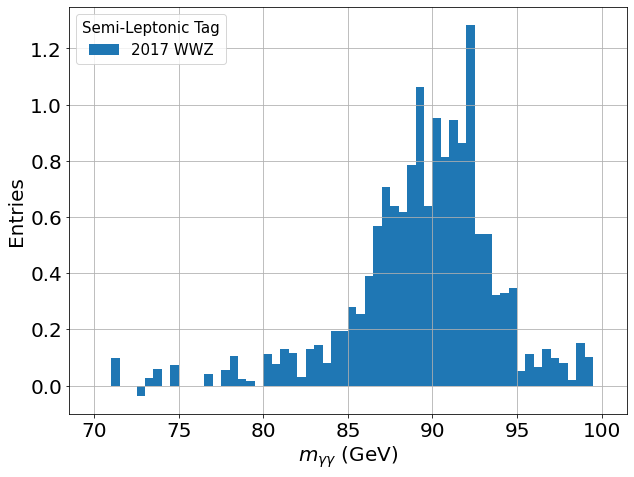

Yield 15.351823385809325
Num values: 972
Num values after mask: 740


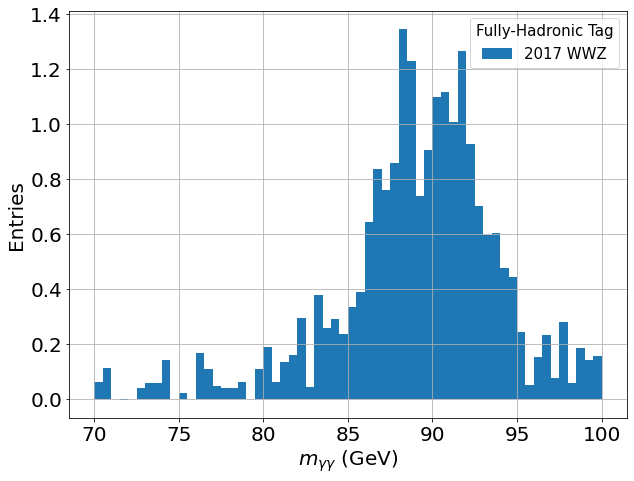

Yield 20.979105617540426
Num values: 41
Num values after mask: 37


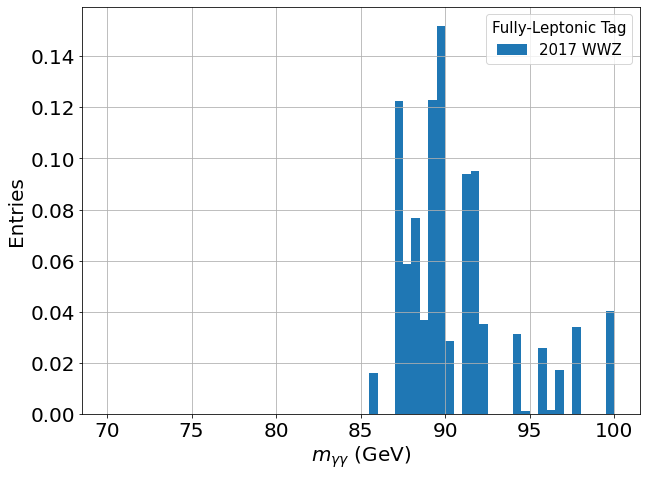

Yield 0.9904658652003491
Num values: 2131
Num values after mask: 1353


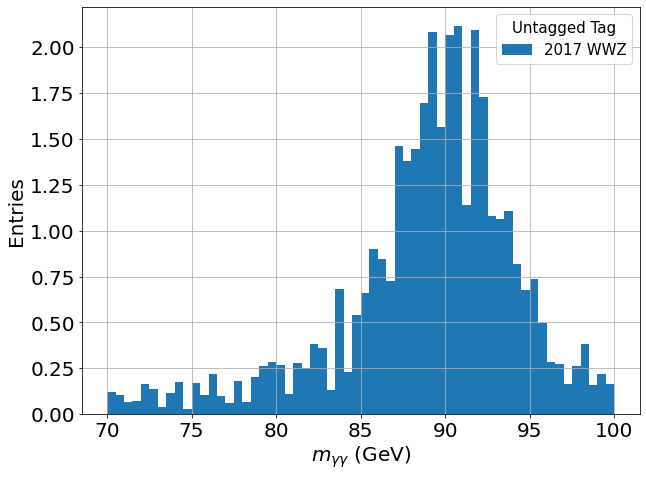

Yield 35.70922839690763
DONE


In [22]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.5)
# xmin, xmax, nbins = 70, 100, 30
xmin, xmax, nbins = 70, 100, 60
bins = np.linspace(xmin, xmax, nbins + 1)
tagDict = {
    "0" : "Semi-Leptonic",
    "1" : "Fully-Hadronic",
    "2" : "Fully-Leptonic",
    "3" : "Untagged"
}

tags = [str(Num) for Num in range(0,4)]
# tags = [str(Num) for Num in range(3,4)]
lumi = 41.5
isWide = 1
for tag in tags:
    tagLabel = tagDict[tag]
#     exec("values = WWZ_CMS_hgg_mass_tag_%s"%(tag)) 
#     MASK = np.logical_and(values > 70, values < 100)
#     values = values[MASK]
    
    exec("WWZ_values = WWZ_CMS_hgg_mass_tag_%s"%(tag))
    exec("WWZ_MC_weights = WWZ_MC_weights_tag_%s"%(tag))
    
    print("Num values:",len(WWZ_values))
    WWZ_MASK = np.logical_and(WWZ_values > xmin, WWZ_values < xmax)
    WWZ_values = WWZ_values[WWZ_MASK]
    WWZ_MC_weights = WWZ_MC_weights[WWZ_MASK]

#     binVals, edges, _ = plt.hist(values, bins = bins)
#     plt.close()
    
    WWZ_MC_weights = [lumi * w for w in WWZ_MC_weights] ##-- scale by 2017 Lumi
    WWZ_binVals, WWZ_edges, _ = plt.hist(WWZ_values, bins = bins, weights = WWZ_MC_weights)
    print("Num values after mask:",len(WWZ_values))
    
    plt.close()

    Yield = np.sum(WWZ_binVals)
    binCenters = [a + 0.5 for a in WWZ_edges[:-1]]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7.5)
    errors = [np.sqrt(N) for N in WWZ_binVals]

#     plt.hist(bins[:-1], weights = WWZ_binVals, bins = bins, label = r"Z$\rightarrow\ell\ell +$jets", zorder = 0)
    plt.hist(bins[:-1], weights = WWZ_binVals, bins = bins, label = r"2017 WWZ", zorder = 0)
    plt.ticklabel_format(style='plain') ##-- Remove scientific notation

#     Add_CMS_Header(plt, lumi, isWide, ax)
    plt.xticks(fontsize = 20)
    plt.xlabel(r"$m_{\gamma\gamma}$ (GeV)", fontsize = 20)
    plt.ylabel(r"Entries", fontsize = 20)
    plt.yticks(fontsize = 20)
#     plt.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, loc = 'upper left')
    plt.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, loc = 'best')
    plt.grid()
    plt.show()
    print("Yield",Yield)
    plt.close()
    
print("DONE")

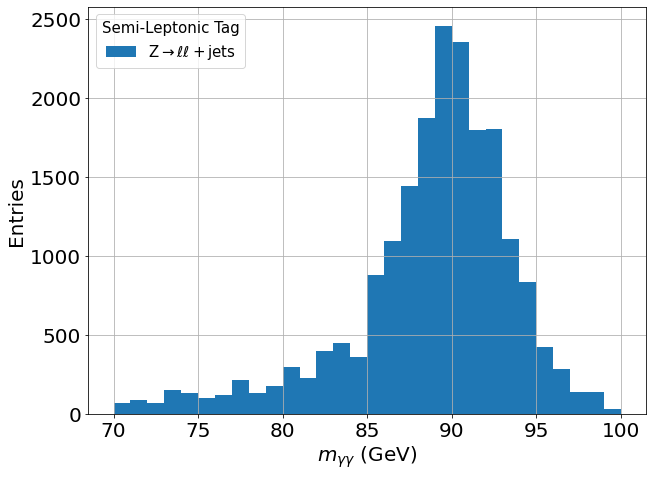

Yield 6961.0


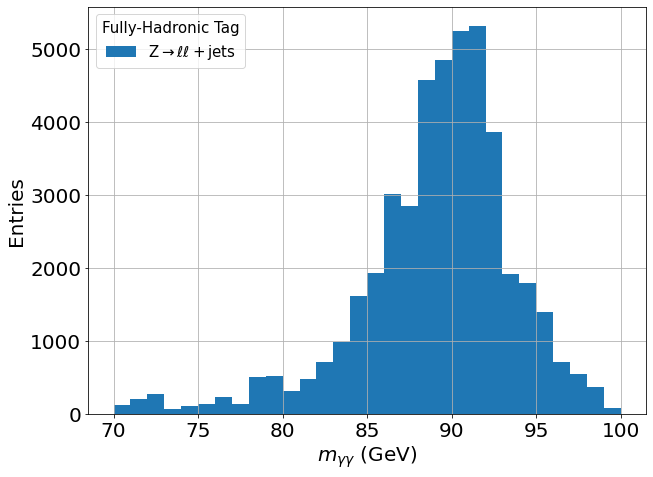

Yield 22079.0


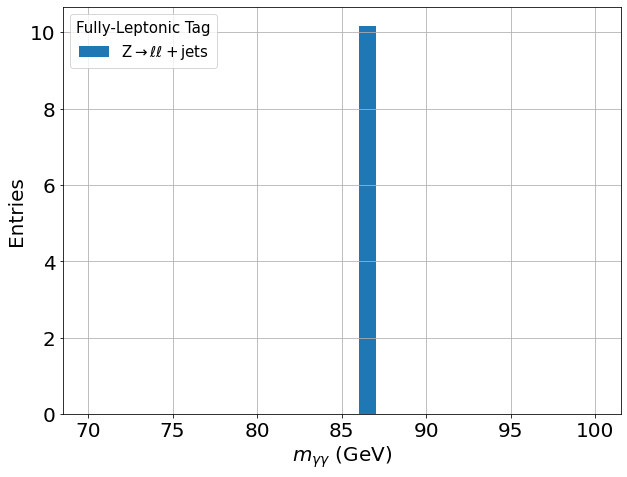

Yield 18.0


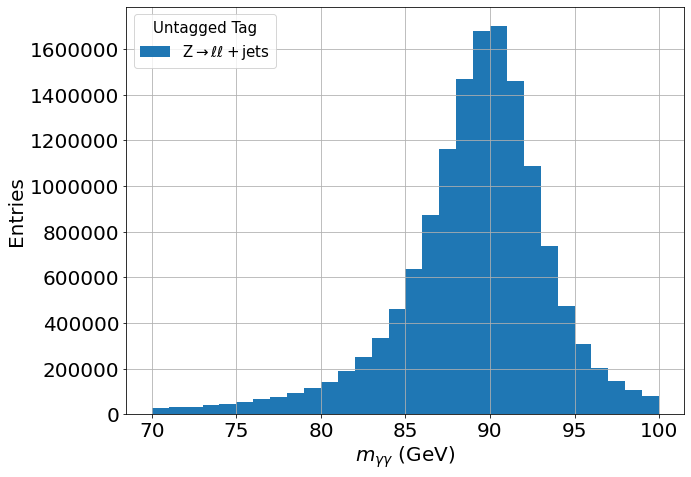

Yield 4103698.0
DONE


In [21]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.5)
bins = np.linspace(70, 100, 31)
tagDict = {
    "0" : "Semi-Leptonic",
    "1" : "Fully-Hadronic",
    "2" : "Fully-Leptonic",
    "3" : "Untagged"
}

tags = [str(Num) for Num in range(0,4)]
# tags = [str(Num) for Num in range(3,4)]
lumi = 41.5
isWide = 1
for tag in tags:
    tagLabel = tagDict[tag]
    exec("values = CMS_hgg_mass_tag_%s"%(tag))
    MASK = np.logical_and(values > 70, values < 100)
    values = values[MASK]
    
    exec("Zee_values = Zee_CMS_hgg_mass_tag_%s"%(tag))
    exec("Zee_MC_weights = Zee_MC_weights_tag_%s"%(tag))
    Zee_MASK = np.logical_and(Zee_values > 70, Zee_values < 100)
    Zee_values = Zee_values[Zee_MASK]
    Zee_MC_weights = Zee_MC_weights[Zee_MASK]


    binVals, edges, _ = plt.hist(values, bins = bins)
    plt.close()
    
    
    Zee_MC_weights = [lumi * w for w in Zee_MC_weights] ##-- scale by 2017 Lumi
    Zee_binVals, Zee_edges, _ = plt.hist(Zee_values, bins = bins, weights = Zee_MC_weights)
    plt.close()


    Yield = np.sum(binVals)
    binCenters = [a + 0.5 for a in edges[:-1]]
    
#     fig, axarr = plt.subplots(2, 
#                                 sharex=True, 
#                                 gridspec_kw={
#                                     'hspace': 0.15,
# #                                     'height_ratios': (0.8,0.2)
#                                     'height_ratios': (0.7,0.3)
#                                     }
#                                 )    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7.5)
#     upper = axarr[0]
#     lower = axarr[1]
#     fig, ax = plt.subplots()
#     fig.set_size_inches(10, 7.5)   
    errors = [np.sqrt(N) for N in binVals]
#     print("binCenters:",binCenters)
#     print("bins",bins)
#     print("bins[:-1]",bins[:-1])
#     print("Zee_binVals:",Zee_binVals)
#     plt.scatter(x = binCenters, y = Zee_binVals, color = 'red') #label = r"Z$\rightarrow$ll")



#     plt.scatter(x = binCenters, y = binVals, color = 'black', s = 60, label = "Data", zorder = 1)
#     plt.errorbar(x = binCenters, y = binVals, yerr = errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line     
    
    
    plt.hist(bins[:-1], weights = Zee_binVals, bins = bins, label = r"Z$\rightarrow\ell\ell +$jets", zorder = 0)

    #     upper.set_yscale("log")
#     ymin, ymax = upper.get_ylim()
#     upper.ylim(0.01, ymax)
    
    
    
#     lower.tick_params(axis = 'x', labelsize = 13)
#     upper.tick_params(axis = 'y', labelsize = 13)
#     lower.tick_params(axis = 'y', labelsize = 13)
#     upper.set_ylabel("Entries", fontsize = 20)
    plt.ticklabel_format(style='plain') ##-- Remove scientific notation
#     lower.set_xlabel(r"$m_{\gamma\gamma}$", fontsize = 20)
#     lower.set_ylabel("Data / MC", fontsize = 20)
#     lower.set_ylim(0, 2)
#     lower.plot([70, 100],[1,1],linestyle=':', color = 'black')
    
#     zero_errors = [0 for entry in binCenters]
#     ratio = np.true_divide(binVals , Zee_binVals, out = np.zeros_like(Zee_binVals), where = Zee_binVals != 0)        
#     lower.errorbar(binCenters, ratio, xerr = zero_errors , yerr = zero_errors, marker = '.', color = 'black', ls = '')  
#     print("ratio:",ratio)



#     Add_CMS_Header(plt, lumi, isWide, ax)
    plt.xticks(fontsize = 20)
    plt.xlabel(r"$m_{\gamma\gamma}$ (GeV)", fontsize = 20)
    plt.ylabel(r"Entries", fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, loc = 'upper left')
    plt.grid()
    plt.show()
    print("Yield",Yield)
    plt.close()
    
print("DONE")

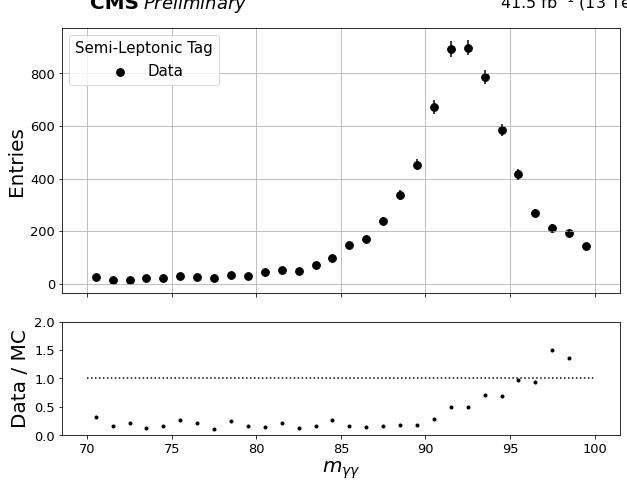

Yield 6961.0


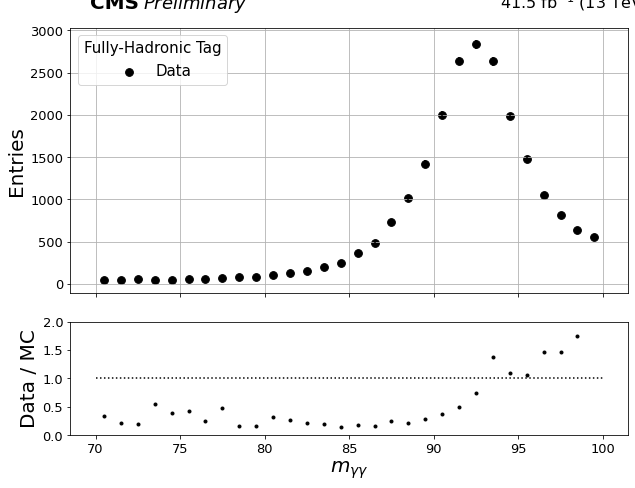

Yield 22079.0


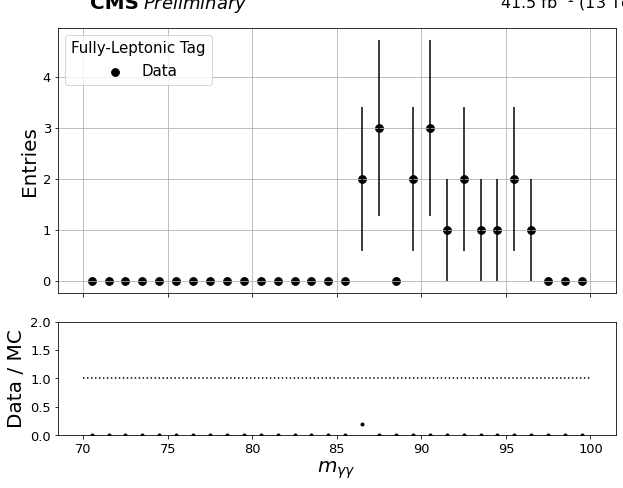

Yield 18.0


In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.5)
bins = np.linspace(70, 100, 31)
tagDict = {
    "0" : "Semi-Leptonic",
    "1" : "Fully-Hadronic",
    "2" : "Fully-Leptonic",
    "3" : "Untagged"
}

tags = [str(Num) for Num in range(0,4)]
# tags = [str(Num) for Num in range(3,4)]
lumi = 41.5
isWide = 1
for tag in tags:
    tagLabel = tagDict[tag]
    exec("values = CMS_hgg_mass_tag_%s"%(tag))
    MASK = np.logical_and(values > 70, values < 100)
    values = values[MASK]
    exec("Zee_values = Zee_CMS_hgg_mass_tag_%s"%(tag))
    exec("Zee_MC_weights = Zee_MC_weights_tag_%s"%(tag))
    Zee_MASK = np.logical_and(Zee_values > 70, Zee_values < 100)
    Zee_values = Zee_values[Zee_MASK]
    Zee_MC_weights = Zee_MC_weights[Zee_MASK]
    binVals, edges, _ = plt.hist(values, bins = bins)
    plt.close()
    Zee_MC_weights = [lumi * w for w in Zee_MC_weights] ##-- scale by 2017 Lumi
    Zee_binVals, Zee_edges, _ = plt.hist(Zee_values, bins = bins, weights = Zee_MC_weights)
    plt.close()
    Yield = np.sum(binVals)
    binCenters = [a + 0.5 for a in edges[:-1]]
    
    fig, axarr = plt.subplots(2, 
                                sharex=True, 
                                gridspec_kw={
                                    'hspace': 0.15,
#                                     'height_ratios': (0.8,0.2)
                                    'height_ratios': (0.7,0.3)
                                    }
                                )    
    fig.set_size_inches(10, 7.5)
    upper = axarr[0]
    lower = axarr[1]
#     fig, ax = plt.subplots()
#     fig.set_size_inches(10, 7.5)   
    errors = [np.sqrt(N) for N in binVals]
#     print("binCenters:",binCenters)
#     print("bins",bins)
#     print("bins[:-1]",bins[:-1])
#     print("Zee_binVals:",Zee_binVals)
#     plt.scatter(x = binCenters, y = Zee_binVals, color = 'red') #label = r"Z$\rightarrow$ll")
    upper.scatter(x = binCenters, y = binVals, color = 'black', s = 60, label = "Data", zorder = 1)
#     upper.errorbar(x = binCenters, y = binVals, yerr = errors, color = 'black', fmt = " ", zorder = 2) ##-- fmt = " " somehow removes the line     
    upper.hist(bins[:-1], weights = Zee_binVals, bins = bins, label = r"Z$\rightarrow\ell\ell$", zorder = 0)

    #     upper.set_yscale("log")
#     ymin, ymax = upper.get_ylim()
#     upper.ylim(0.01, ymax)
    
    lower.tick_params(axis = 'x', labelsize = 13)
    upper.tick_params(axis = 'y', labelsize = 13)
    lower.tick_params(axis = 'y', labelsize = 13)
    upper.set_ylabel("Entries", fontsize = 20)
    upper.ticklabel_format(style='plain') ##-- Remove scientific notation
    lower.set_xlabel(r"$m_{\gamma\gamma}$", fontsize = 20)
    lower.set_ylabel("Data / MC", fontsize = 20)
    lower.set_ylim(0, 2)
    lower.plot([70, 100],[1,1],linestyle=':', color = 'black')
    
    zero_errors = [0 for entry in binCenters]
    ratio = np.true_divide(binVals , Zee_binVals, out = np.zeros_like(Zee_binVals), where = Zee_binVals != 0)        
    lower.errorbar(binCenters, ratio, xerr = zero_errors , yerr = zero_errors, marker = '.', color = 'black', ls = '')  
#     print("ratio:",ratio)
    Add_CMS_Header(plt, lumi, isWide, upper)
    
    upper.legend(title = "%s Tag"%(tagLabel), fontsize = 15, title_fontsize = 15, loc = 'upper left')
    upper.grid()
    plt.show()
    print("Yield",Yield)
    plt.close()
    
print("DONE")